<a href="https://colab.research.google.com/github/ferngonzalezp/deep_learning_lab/blob/main/2022/TP1_ML_for_science_and_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Deep Learning with Python: session 1

Welcome to this introduction of Machine Learning with Python. This lab sessions are designed to give the student a practical introduction to the world of Machine Learning along with some theory. The goal of this course is to get a hands-on introduction to Machine learning and be able to use these tools to solve practicals problems in science and engineering. Nowadays, data is enabling new discoveries in many fields of informatics and science, is for great importance for the scientists and engineers of today to be able to understand anto be skeptical of Machine Learning and see it more of a tool in the arsenal with its downsides and benefits rather than alchemy or a fashion.



---



#Inital Motivation for Machine Learning

Machine Learning has gained recent Interest in the last years, and for good reason. It has allowed scientist and engineers to achieve tasks with greater degree of accuracy that couldn't be achieved before with other methods. Right now deep learning has been used extensively in the following tasks in which is the best method there is right now:


* Natural language processing (NLP): Answering questions; speech recognition; summarizing documents; classifying documents; finding names, dates, etc. in documents; searching for articles mentioning a concept
*   Computer vision:: Satellite and drone imagery interpretation (e.g., for disaster resilience); face recognition; image captioning; reading traffic signs; locating pedestrians and vehicles in autonomous vehicles
*    Medicine:: Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
*    Biology:: Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
*    Image generation:: Colorizing images; increasing image resolution; removing noise from images; converting images to art in the style of famous artists
*    Recommendation systems:: Web search; product recommendations; home page layout
*    Playing games:: Chess, Go, most Atari video games, and many real-time strategy games
*    Robotics:: Handling objects that are challenging to locate (e.g., transparent, shiny, lacking texture) or hard to pick up
*    Other applications:: Financial and logistical forecasting, text to speech, and much more...


# What is Machine Learning?

We'll let machine learning respond that question. For that reason we wrote a custom prompt in this [web app](https://app.inferkit.com/demo) that said "**what is machine learning? Machine learning is**" and got this answer:

\\
`What is machine learning? Machine learning is a form of artificial intelligence where computers are given experiences and the computer "learns" from the experience and improves its own future predictions. Essentially, it lets the computer draw conclusions from the patterns it has observed in the past. This is useful for all sorts of reasons, such as automatic speech recognition (for example) or weather forecasts. It is an area of computing that is set to dominate the future and has been given a lot of attention in the tech industry.`

\\
That is a very good description. As the statement implies, machine learning is basically a set of methods to program computers in order that they can learn from examples. For that model to be able to reproduce a text as the previous ones it required lots and lots of text data and adjust itself internally based on a score of some sort, we'll later talk about that. In this picture is illustrated the building blocks of a machine learning model.

\\
<img src='https://drive.google.com/uc?id=1JIpwDf4ZFxcLkTwYoY-ij9UBDsbkeoz-'>

Deep learning is the field inside of machine learning that uses Neural Networks as its principal building block for models. Deep learning also introduces a paradigm shift on how machine learning is done: In traditional machine learning, the input data has to be pre-processed extensively and the features to be learned by the algorithm has to be manually defined. In Deep Learning, these features or representations are learned automatically by the model, in exchange, deep learning models tendo to need more data and computational resources in most cases.

\\
<img src='https://drive.google.com/uc?id=1K3zwaC6uTlfu4n_YdnWTtrD1lIzFEPxm' width="500" height="300">


## How these models learn?

After we feed the model data and it outputs a prediction, we need to pass that value to a score we want to optimize, this score is usually called the "loss" of a model, and the training process is basically the optimization of this value.

\\

The optimization process for Neural Networks is based on [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

\\

<img src="https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg" width=500 height=300>



________________________

Now, we will see a gradient descent eaxmple using python. Using python and numpy.

In [ ]:
import numpy as np

def gradient_descent(

    gradient, start, learn_rate, n_iter=50, tolerance=1e-06

):

    vector = start

    for _ in range(n_iter):

        diff = -learn_rate * gradient(vector)

        if np.all(np.abs(diff) <= tolerance):

            break

        vector += diff

    return vector


*    **gradient** is the function or any Python callable object that takes a vector and returns the gradient of the function you’re trying to minimize.
*    **start** is the point where the algorithm starts its search, given as a sequence (tuple, list, NumPy array, and so on) or scalar (in the case of a one-dimensional problem).
*    **learn_rate** is the learning rate that controls the magnitude of the vector update.
*   **n_iter** is the number of iterations.

\\

We will use this algorithm to find the minimum of a simple convex function:

$y = x^2$

which we know it's gradient is:

$y' = 2x$


In [ ]:
y_prime = lambda x: 2*x

Here, we use gradient descent to find the minimum of a function. And plot the different steps it takes until it finds the minimum. Try to adjust the learning rate to see what happens.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Parameters for Gradient descent
start = 10
learn_rate = 0.2
tol = 1e-6
n_steps = 50

#Plot of the function
x = np.linspace(-10,10)
y = lambda x: x**2
plt.plot(x,y(x))

#The optimization loop, we do it in such a way to obtain the result in each step.
results =[start]
for step in range(n_steps):
  
  min = gradient_descent(y_prime,start,learn_rate,1)
  results.append(min)
  if np.abs(start-min) < tol:
    break
  start = min

results = np.array(results)
plt.plot(results, y(results), '-*g')

Try to change the function to a non convex one and it's gradient to see how it behaves!

_________________________________________
Gradient Descent is a simple and fast way to find a minimum, but when the number of parameters of a function increases and when there is non-convexity then the algorithm requires some modifications to work properly.

## Exercise: Find Optimal Dimensions

We want to fabricate an aluminum can with cylindrical shape with capacity for 1L. What the dimensions should be for minimizing the mass?

First, formulate the optimization problem and find the optimal values using gradient descent, assume the thickness of the can is fixed.

In [ ]:
# Write your solution below

## Stochastic Gradient Descent

Stochastic gradient descent algorithms are a modification of gradient descent. In stochastic gradient descent, you calculate the gradient using just a random small part of the observations instead of all of them. In some cases, this approach can reduce computation time.

Online stochastic gradient descent is a variant of stochastic gradient descent in which you estimate the gradient of the cost function for each observation and update the decision variables accordingly. This can help you find the global minimum, especially if the objective function is convex.

Batch stochastic gradient descent is somewhere between ordinary gradient descent and the online method. The gradients are calculated and the decision variables are updated iteratively with subsets of all observations, called minibatches. This variant is very popular for training neural networks.

You can imagine the online algorithm as a special kind of batch algorithm in which each minibatch has only one observation. Classical gradient descent is another special case in which there’s only one batch containing all observations.

From now on we will refer to the minibatch stocasthic gradient descent as stochastic gradient descent (SGD).

# Linear Regression

#### Simple Regression

We will start by a [simple Linear regression problem](https://en.wikipedia.org/wiki/Simple_linear_regression). In this problem we want to fit a distribution of points in 2D space with a curve. This curve can be linear, a polynomial of any order or even an exponential; the selection of curve depends on the nature of the data we have at hand, and to some extent this represents a limititation of doing regression in this fashion, we need certain prior information of the data befor applying the model, as opposed to the use of neural networks where we can learn that this distribution (but let's leave this to a further topic).

\\

First, we will do Linear regression in a classical way using the Least squares method. In linear regresion we want to the determine the slope and intercept (weight and bias) of a line equation:

\begin{equation}
  \hat{y} = b + w x
\end{equation}

\\

In the least squares method, we want to minimize the squared error between predictions and observations:

\begin{equation}
  error = \frac{1}{n} \sum^n{(y-\hat{y})^2}
\end{equation}

\\

We then can find the weight and bias just by taking the derivative of the error w.r.t. the parameters of our curve and equal to zero. We now are going to derive the formula for finding these values but first we will reformulate or curve equation in a matrix way:

\begin{equation}
  \hat{y} = \begin{bmatrix}1 & x\end{bmatrix} . \begin{bmatrix}b\\w\end{bmatrix}
\end{equation}
 \\
Now this reduces to a linear system, that can be rewritten as  $\hat{y}=X\theta$, where $\theta$ is the parameters vector of our model and X is the set of independent variables. We can now rewrite the error as:


\begin{equation}
  error = (Y-X\theta)^2\\
  error = (Y-X\theta)^T(Y-X\theta)\\
  error = Y^TY - \theta^TX^TY - Y^TX\theta + \theta^TX^TX\theta\\
  error = Y^TY - 2\theta^TX^TY + \theta^TX^TX\theta
\end{equation}

\\

This reduction is possible because $\theta^TX^TY = Y^TX\theta$, which are scalars and their transpose is the same scalar:

\begin{equation}
  (\theta^TX^TY)^T = (X^TY)^T\theta = Y^TX\theta
\end{equation}

\\

The the derivative of the error w.r.t. the parameters is:

\begin{equation}
  \partial{error}/\partial{\theta} = -2X^TY + X^TX\theta + \theta^TX^TX = -2X^TY + 2X^TX\theta
\end{equation}

\\

Equalizing the derivative to zero when then have:

\begin{equation}
  X^TY = X^TX\theta\\
  \theta = (X^TX)^{-1}X^TY
\end{equation}

\\

Now we have a general formula for fitting the parameters, for any linear function!

Now let's solve a simple problems, first we need data to fit. For this reason we will generate some points from a cuadractic function, but we will add some random noise:

In [ ]:
n_samples = 20
X = np.sort(np.random.uniform(0,10,(n_samples)))
y = lambda x: x**2 + np.random.uniform(-10,10,(len(x)))
Y = y(X)
plt.scatter(X,Y)

Here we make a function to calculate the vector of parameters based on the previous formula:

In [ ]:
def lssr(Y, X):
  X = np.vstack((np.ones(np.size(X,axis=-1)),X)).transpose()
  B = np.matmul(X.transpose(),X)
  B = np.matmul(np.linalg.inv(B),X.transpose())
  return np.matmul(B,Y)

Determine the parameters of our curve:

In [ ]:
Theta = lssr(Y,X)

Now visualize the fitted line and the observable points.

In [ ]:
plt.scatter(X,Y)
fit = Theta[0] + Theta[1]*X
plt.plot(X,fit,'r')

Now we are goind to try to fit the points but with a cuadratic function: $y = b + w_1x + w_2x^2$. Use the function we created before to obtain the parameters of this curve.

In [ ]:
x2 = X**2
X = np.vstack((X,x2))
Theta_cuadratic = lssr(Y,X)

Now plot the results, is this model better suited to the data?

In [ ]:
plt.scatter(X[0],Y)
fit = Theta_cuadratic[0] + Theta_cuadratic[1]*X[0] + Theta_cuadratic[2]*X[1]
plt.plot(X[0],fit,'r')

Now we are going to use gradient descent, to solve this same problem. First we have to create a function ta updates the coefficients based on a gradient descent step. Remember that we are trying to minimize de error function, in gradient descent we don't need an analytic formula of the gradient so we can simply take as gradient: 
\begin{equation}
\partial{error}/\partial{\theta} = \frac{1}{n}\sum^n 2(\hat{Y}-Y)X
\end{equation}
\\
being $n$ the number of observations. Now we write the function:

In [ ]:
def sgd_update(X, Y, Theta, l_rate):
      X = np.vstack((np.ones(np.size(X,axis=-1)),X)).transpose()
      Yhat = np.matmul(X,Theta)
      grad_error = np.mean(np.einsum('i,ij->ij',2*(Yhat-Y),X), axis = 0)
      Theta  = Theta - l_rate * grad_error
      return Theta

In this part we find the optimun using SGD:

In [ ]:
Theta_sgd = np.zeros(2)
n_epochs = 2000
lr = 0.01
for i in range(n_epochs):
  y = sgd_update(X[0],Y,Theta_sgd,lr)
  diff = np.abs(np.sum(y-Theta_sgd))
  Theta_sgd = y
  if diff < 1e-6:
    break

Now we plot the results:

In [ ]:
plt.scatter(X[0],Y)
fit = Theta_sgd[0] + Theta_sgd[1]*X[0]
plt.plot(X[0],fit,'r')
error_linear = np.mean((Y - fit)**2)

In [ ]:
print(error_linear)

We compare the results obtained with the analytical way and using SGD:

In [ ]:
print('result with SGD:')
print(Theta_sgd)
print('result in analytical way:')
print(Theta)

Now we are going to fit a line with some added gaussian noise:

In [ ]:
n_samples = 50
X = np.sort(np.random.uniform(-10,10,(n_samples)))
y = lambda x: x + np.random.normal(0,1,n_samples)
Y = y(X)
plt.scatter(X,Y)

In [ ]:
coef_sgd = np.zeros(2)
n_epochs = 2000
lr = 0.01
for i in range(n_epochs):
  y = sgd_update(X,Y,coef_sgd,lr)
  diff = np.abs(np.sum(y-coef_sgd))
  coef_sgd = y
  if diff < 1e-6:
    break

plt.scatter(X,Y)
fit = coef_sgd[0] + coef_sgd[1]*X
plt.plot(X,fit,'r')
error_linear = np.mean((Y - fit)**2)

In [ ]:
print(error_linear)

But this time we are going to use a linear polynomial or third order and use SGD:

In [ ]:
coef_sgd = np.zeros(4)
#Based on what you have learned so far, fit the points using a third order polynomial: y = b + w1*x + w2*x**2 + w3*x**3 

Now we plot the results, what happended?

In [ ]:
#plot the points and the fitted polynomial
#Also, calculate de Mean Squared error
error_cubic = 

In [ ]:
print(error_cubic)

This phenomenon is called [overfitting](https://en.wikipedia.org/wiki/Overfitting). Here it happened because our model has more parameters than need for the data, it fitted exactly some points of the distribution but in certain areas the error may be to high, resulting in a higher MSE.

#### Multi_Dimensional Linear Regression

In this part we will try to solve a [Linear regression](https://en.wikipedia.org/wiki/Linear_regression) problem using SGD programmed from scratch.
After we develop our linear regression algorithm with stochastic gradient descent, we will use it to model the wine quality dataset.

This dataset is comprised of the details of 4,898 white wines including measurements like acidity and pH. The goal is to use these objective measures to predict the wine quality on a scale between 0 and 10.

Each columm of the dataset represent the following attributes:

Attribute information:

   Input variables (based on physicochemical tests):
   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4. residual sugar
   5. chlorides
   6. free sulfur dioxide
   7. total sulfur dioxide
   8. density
   9. pH
   10. sulphates
   11. alcohol
   Output variable (based on sensory data): 
   12. quality (score between 0 and 10)

Click [here](https://drive.google.com/file/d/1KKvWK7pmDtJXN5zEA7w0Xje-qbP2FrJI/view?usp=sharing) to download the dataset and the [description](https://drive.google.com/file/d/1dhXvJgR5TRWCk69VTpOznrlyIyTfG3JE/view?usp=sharing).

the function we are trying to fit with this method it is:

\begin{equation}
  \hat{Y} = b_0 + W^T X = X\theta
\end{equation}

Where b_0 is a bias, W is the weight vector and X is the vector of independent variables.

\\

In this case we will use mini-batches in stochastic gradient descent for calculating the gradients and updating, the motivation for this is that by doing it this way we are dealing with matrixes of reduced size. The forumula for mini-batch of SGD changes to:

\begin{equation}
  \theta_k = \theta_{k-1} - lr * \frac{1}{b}\sum_1^b 2(\hat{Y}-Y)X \\
  b < size \ of \ the \ dataset
\end{equation}

With this two terms arise:

* Iteration: Is a SGD update step with a batch.
* Epoch: an epoch completes when we iterate throug the whole training dataset. For better performance, the batches elements are picked randomly from the dataset, this helps with convergence.


In [ ]:
# Linear Regression With Stochastic Gradient Descent for Wine Quality
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from math import ceil
from numpy import genfromtxt
from random import shuffle

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = dataset[:,i]
		value_min = col_values.min()
		value_max = col_values.max()
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
  for i in range(len(dataset[0])):
			dataset[:,i] = (dataset[:,i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
  return dataset

# Make a prediction with coefficients
def predict(batch, coefficients):
    yhat = np.matmul(batch[:,:-1],coefficients[1:]) + coefficients[0]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def sgd_update(batch, Theta, l_rate):
      X = batch[:,:-1].transpose()
      Y = batch[:,-1]
      X = np.vstack((np.ones(np.size(X,axis=-1)),X)).transpose()
      Yhat = np.matmul(X,Theta)
      grad_error = np.mean(np.einsum('i,ij->ij',2*(Yhat-Y),X), axis = 0)
      Theta  = Theta - l_rate * grad_error
      return Theta

In [ ]:
#Evaluation Metric
def mse_metric(actual, predicted):
  return np.mean((actual-predicted)**2)

In [ ]:
# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
#dataset = load_csv(filename)
dataset = genfromtxt(filename, delimiter=';')
# normalize
minmax = dataset_minmax(dataset)
dataset = normalize_dataset(dataset, minmax)
train_data = dataset[:4000]
test_data = dataset[4000:]
#Training paramateres
n_epochs = 500
batch_size = 500
l_rate = 0.1
#Initialize Coefficients with zeros
coef = np.zeros((len(dataset[0])))
#indexes of rows
idx = list(range(len(train_data[:,0])))
n_iterations = ceil(len(train_data[:,0])/batch_size)
#training loop
loss = []
for i in range(n_epochs):
  shuffle(idx)
  for j in range(n_iterations):
    if j==n_iterations-1:
      batch = train_data[idx[j*batch_size:]]
    else:
      batch = train_data[idx[j*batch_size:(j+1)*batch_size]]
    coef = sgd_update(batch, coef, l_rate)
    prediction = predict(batch, coef)
    mse = mse_metric(batch[:,-1],prediction)
    loss.append(mse)
    if j%50 == 0 :
      print("epoch: %d Iteration: %d/%d MSE: %.4f \n" % ((i+1), (j+1), n_iterations, mse))

In [ ]:
plt.plot(loss)
plt.title("MSE")

Now we test the coefficients with the test data we didn't used for training.

In [ ]:
test_predictions = predict(test_data,coef)
print(mse_metric(test_data[:,-1],test_predictions))

In [ ]:
idxs = np.random.randint(0,np.size(test_data,0),5)
print('Wine Quality:')
print(test_data[idxs,-1]*(minmax[-1][1]-minmax[-1][0]) + minmax[-1][0])
print('Predicted Wine Quality:')
print(test_predictions[idxs]*(minmax[-1][1]-minmax[-1][0]) + minmax[-1][0])

We obtained a fit for the data with a Mean squared error of 0.014, try changing the batch size and learning rate to see what effect it gives to the optimization process. Maybe the advantage of SGD cannot be seen in this problem but as dimensionality increases it becomes a really useful tool for training Deep learning models.

## Exercise: Linear Regression

given the following relation:


$$ k = \frac{k_{max}c^2}{c_s + c}$$

where $c_s$ and $k_{max}$ are parameters. Linearize the equation and given the data below use linear regression with gradient descent for finding $c_s$ and $k_{max}$. Use the parameters to find k when c = 6 mg/L.

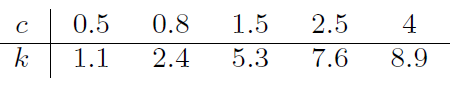